### Задание № 2 Ultra Lite


#### Полносвязные сети, обучающая и тестовая выборки

Создайте модель для распознавания рукописных цифр из набора MNIST (можно воспользоваться ноутбуком 1-го занятия) и проведите ряд тестов:

Запустите сеть с различными размерами обучающей и проверочной выборок:

Размер test_size=0.1

Размер test_size=0.5

Размер test_size=0.9

Напишите выводы, как изменение test_size влияет на точность сети.


#### 1. Импорт библиотек.

In [118]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pandas as pd # Библиотека pandas
from sklearn.model_selection import train_test_split
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
%matplotlib inline 

#### 2. Загрузка базы mnist.

In [250]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() 

In [251]:
print(type(x_train_org))

<class 'numpy.ndarray'>


In [252]:
print("Length of array:",len(x_train_org),"Length of array:",len(x_test_org))

Length of array: 60000 Length of array: 10000


In [253]:
X = np.concatenate((x_train_org, x_test_org))

In [254]:
Y = np.concatenate((y_train_org, y_test_org))
Y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [255]:

print ("Length of array:",len(X), len(Y))

Length of array: 70000 70000


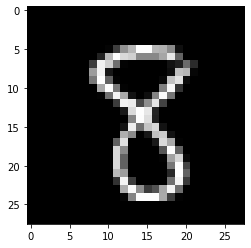

In [256]:
n = 144 #Номер картинки
plt.imshow(Image.fromarray(X[n]).convert('RGB')) #Отрисовка картинки
plt.show() # Вывод картинки

In [257]:
Y[n]

8

## Размер test_size=0.1

In [260]:
# test_size=0.1 - будет выделено 10% от тренировочных данных 

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(X, Y, test_size=0.1, shuffle=True)    
print (x_train_1.shape)
print (x_test_1.shape)
print (y_train_1.shape)
print (y_test_1.shape)

(63000, 28, 28)
(7000, 28, 28)
(63000,)
(7000,)


In [261]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_1.reshape(63000, 784)
x_test = x_test_1.reshape(7000, 784)
print(x_train_1.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train_1.shape)
print(y_test_1.shape)

(63000, 28, 28)
(63000, 784)
(7000, 784)
(63000,)
(7000,)


#### 3. Нормирование и преобразование x_train и y_train.

In [262]:
#Нормализуем входные картинки
x_train = x_train.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # преобразовываем x_test в тип float (цифры с плавающей точкой)
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

In [263]:
y_train_1[0]

6

In [264]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_1, 10)
y_test = utils.to_categorical(y_test_1, 10)

In [265]:
#Выводим размер y_train
#60 тысяч примеров, каждый размера 10 (так как 10 классов)
print(y_train.shape)

(63000, 10)


#### 4. Создание нейронной сети.

In [266]:
model = Sequential() # Создаём сеть прямого распространения
model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
model.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

In [267]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
print(model.summary()) #Вывод структуры модели

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_16 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


#### 5. Обучение нейронной сети.

In [268]:
model.fit(x_train, y_train, batch_size=128, epochs=14, verbose=1)

Epoch 1/14
493/493 [==============================] - 3s 6ms/step - loss: 0.1985 - accuracy: 0.9409
Epoch 2/14
493/493 [==============================] - 3s 6ms/step - loss: 0.0730 - accuracy: 0.9774
Epoch 3/14
493/493 [==============================] - 3s 6ms/step - loss: 0.0465 - accuracy: 0.9855
Epoch 4/14
493/493 [==============================] - 3s 6ms/step - loss: 0.0327 - accuracy: 0.9891
Epoch 5/14
493/493 [==============================] - 3s 6ms/step - loss: 0.0251 - accuracy: 0.9917
Epoch 6/14
493/493 [==============================] - 5s 9ms/step - loss: 0.0215 - accuracy: 0.9926
Epoch 7/14
493/493 [==============================] - 4s 7ms/step - loss: 0.0166 - accuracy: 0.9947
Epoch 8/14
493/493 [==============================] - 3s 7ms/step - loss: 0.0153 - accuracy: 0.9948
Epoch 9/14
493/493 [==============================] - 4s 7ms/step - loss: 0.0141 - accuracy: 0.9957
Epoch 10/14
493/493 [==============================] - 4s 7ms/step - loss: 0.0111 - accuracy: 0.9963

In [269]:
model.save_weights('model_2.h5')
model.load_weights('model_2.h5')

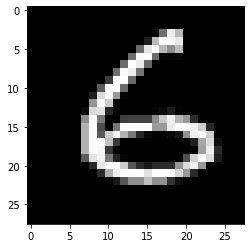

In [270]:
n_rec = 387 #Номер тестовой цифры, которую будем распознавать
plt.imshow(Image.fromarray(x_test_1[n_rec]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
plt.show()

In [271]:
#Выбираем нужную картинку из тестовой выборки
x = x_test[n_rec]
print(x.shape)

(784,)


In [272]:
#Добавляем одну размерность в конце, чтобы нейронка могла распознать пример

x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 784)


In [273]:
prediction = model.predict(x) #Распознаём наш пример

In [274]:
print(prediction) #Выводим результат

[[4.9378512e-10 4.8201009e-17 2.5158620e-14 1.0587589e-17 2.1954804e-13
  1.2721077e-11 1.0000000e+00 3.0861501e-19 2.6717057e-12 1.6293625e-13]]


In [275]:
sum(prediction[0])

1.0000000005095855

In [276]:
pred = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(pred)

6


In [278]:
print(y_test_1[n_rec]) #выводим правильный ответ, для сравнения

6


## Размер test_size=0.5





In [279]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() 

In [280]:
X = np.concatenate((x_train_org, x_test_org))

In [281]:
Y = np.concatenate((y_train_org, y_test_org))

In [282]:
# test_size=0.5 - будет выделено 50% от тренировочных данных 

x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(X, Y, test_size=0.5, shuffle=True)    
print (x_train_5.shape)
print (x_test_5.shape)
print (y_train_5.shape)
print (y_test_5.shape)

(35000, 28, 28)
(35000, 28, 28)
(35000,)
(35000,)


In [283]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_5.reshape(35000, 784)
x_test = x_test_5.reshape(35000, 784)
print(x_train_5.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train_5.shape)
print(y_test_5.shape)

(35000, 28, 28)
(35000, 784)
(35000, 784)
(35000,)
(35000,)


#### 3. Нормирование и преобразование x_train и y_train.

In [284]:
#Нормализуем входные картинки
x_train = x_train.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # преобразовываем x_test в тип float (цифры с плавающей точкой)
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

In [287]:
y_train_5[0]

6

In [288]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_5, 10)
y_test = utils.to_categorical(y_test_5, 10)

In [289]:
#Выводим размер y_train
#60 тысяч примеров, каждый размера 10 (так как 10 классов)
print(y_train.shape)

(35000, 10)


#### 4. Создание нейронной сети.

In [290]:
model = Sequential() # Создаём сеть прямого распространения
model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
model.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

In [291]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
print(model.summary()) #Вывод структуры модели

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_19 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


#### 5. Обучение нейронной сети.

In [292]:
model.fit(x_train, y_train, batch_size=128, epochs=14, verbose=1)

Epoch 1/14
274/274 [==============================] - 2s 7ms/step - loss: 0.2609 - accuracy: 0.9235
Epoch 2/14
274/274 [==============================] - 2s 6ms/step - loss: 0.0951 - accuracy: 0.9716
Epoch 3/14
274/274 [==============================] - 2s 6ms/step - loss: 0.0559 - accuracy: 0.9825
Epoch 4/14
274/274 [==============================] - 2s 6ms/step - loss: 0.0378 - accuracy: 0.9883
Epoch 5/14
274/274 [==============================] - 2s 6ms/step - loss: 0.0254 - accuracy: 0.9922
Epoch 6/14
274/274 [==============================] - 2s 6ms/step - loss: 0.0176 - accuracy: 0.9945
Epoch 7/14
274/274 [==============================] - 2s 6ms/step - loss: 0.0192 - accuracy: 0.9937
Epoch 8/14
274/274 [==============================] - 2s 7ms/step - loss: 0.0204 - accuracy: 0.9931
Epoch 9/14
274/274 [==============================] - 2s 6ms/step - loss: 0.0127 - accuracy: 0.9955
Epoch 10/14
274/274 [==============================] - 2s 7ms/step - loss: 0.0092 - accuracy: 0.9972

In [293]:
model.save_weights('model_2.h5')
model.load_weights('model_2.h5')

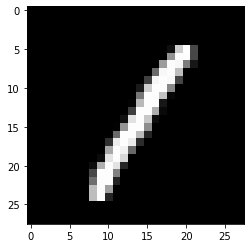

In [294]:
n_rec = 387 #Номер тестовой цифры, которую будем распознавать
plt.imshow(Image.fromarray(x_test_5[n_rec]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
plt.show()

In [295]:
#Выбираем нужную картинку из тестовой выборки
x = x_test[n_rec]
print(x.shape)

(784,)


In [296]:
#Добавляем одну размерность в конце, чтобы нейронка могла распознать пример

x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 784)


In [297]:
prediction = model.predict(x) #Распознаём наш пример

In [298]:
print(prediction) #Выводим результат

[[6.4488463e-11 1.0000000e+00 4.4502069e-11 2.9212676e-15 2.6551780e-10
  2.1805471e-14 1.7281707e-12 7.1514172e-10 8.7667547e-12 2.6993951e-13]]


In [299]:
sum(prediction[0])

1.0000000011004397

In [300]:
pred = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(pred)

1


In [301]:
print(y_test_5[n_rec]) #выводим правильный ответ, для сравнения

1



## Размер test_size=0.9

In [302]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() 

In [303]:
X = np.concatenate((x_train_org, x_test_org))

In [304]:
Y = np.concatenate((y_train_org, y_test_org))

In [305]:
# test_size=0.9 - будет выделено 90% от тренировочных данных 

x_train_9, x_test_9, y_train_9, y_test_9 = train_test_split(X, Y, test_size=0.9, shuffle=True)    
print(x_train_9.shape)
print(y_test_9.shape)

(7000, 28, 28)
(63000,)


In [306]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_9.reshape(7000, 784)
x_test = x_test_9.reshape(63000, 784)
print(x_train_9.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train_9.shape)
print(y_test_9.shape)

(7000, 28, 28)
(7000, 784)
(63000, 784)
(7000,)
(63000,)


#### 3. Нормирование и преобразование x_train и y_train.

In [307]:
#Нормализуем входные картинки
x_train = x_train.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # преобразовываем x_test в тип float (цифры с плавающей точкой)
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

In [308]:
y_train_9[0]

6

In [309]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_9, 10)
y_test = utils.to_categorical(y_test_9, 10)

In [310]:
#Выводим размер y_train
#60 тысяч примеров, каждый размера 10 (так как 10 классов)
print(y_train.shape)

(7000, 10)


#### 4. Создание нейронной сети.

In [311]:
model = Sequential() # Создаём сеть прямого распространения
model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
model.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

In [312]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
print(model.summary()) #Вывод структуры модели

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_22 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


#### 5. Обучение нейронной сети.

In [313]:
model.fit(x_train, y_train, batch_size=128, epochs=14, verbose=1)

Epoch 1/14
55/55 [==============================] - 1s 7ms/step - loss: 0.5569 - accuracy: 0.8323
Epoch 2/14
55/55 [==============================] - 0s 7ms/step - loss: 0.1953 - accuracy: 0.9414
Epoch 3/14
55/55 [==============================] - 0s 7ms/step - loss: 0.1140 - accuracy: 0.9667
Epoch 4/14
55/55 [==============================] - 0s 7ms/step - loss: 0.0733 - accuracy: 0.9793
Epoch 5/14
55/55 [==============================] - 0s 7ms/step - loss: 0.0419 - accuracy: 0.9890
Epoch 6/14
55/55 [==============================] - 0s 7ms/step - loss: 0.0211 - accuracy: 0.9954
Epoch 7/14
55/55 [==============================] - 0s 7ms/step - loss: 0.0099 - accuracy: 0.9991
Epoch 8/14
55/55 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 0.9997
Epoch 9/14
55/55 [==============================] - 0s 7ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 10/14
55/55 [==============================] - 0s 7ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 11/14
55/55 [

In [314]:
model.save_weights('model_2.h5')
model.load_weights('model_2.h5')

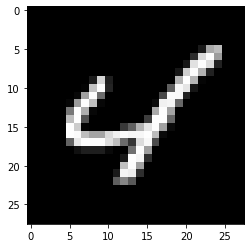

In [315]:
n_rec = 387 #Номер тестовой цифры, которую будем распознавать
plt.imshow(Image.fromarray(x_test_9[n_rec]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
plt.show()

In [316]:
#Выбираем нужную картинку из тестовой выборки
x = x_test[n_rec]
print(x.shape)

(784,)


In [317]:
#Добавляем одну размерность в конце, чтобы нейронка могла распознать пример

x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 784)


In [318]:
prediction = model.predict(x) #Распознаём наш пример

In [319]:
print(prediction) #Выводим результат

[[7.7763829e-10 7.8503346e-09 5.1634115e-09 7.8795681e-10 9.9999666e-01
  2.9746156e-08 3.9107502e-07 1.2024915e-07 8.1094549e-07 2.1069441e-06]]


In [320]:
sum(prediction[0])

1.000000135679124

In [321]:
pred = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(pred)

4


In [322]:
print(y_test_9[n_rec]) #выводим правильный ответ, для сравнения

4


## Напишите выводы, как изменение test_size влияет на точность сети.

**По результатам проведенных тестов с различными test_size можно отметить, что при увеличении размера тестовой выборки показатель ошибки снижался (loss), а показатель accuracy рост (на последнем тесте достиг единицы).**

P.S. результат меня удивил, я думала, что при снижении размера обучающей выборки модель не сможет правильно обучиться и ошибка будет расти...